# Imbalanced Dataset - German Credit

Você foi selecionado para criar um modelo para prever se o cliente irá pagar ou não irá pagar o empréstimo que está solicitando.

Base de dados: https://www.kaggle.com/datasets/uciml/german-credit

# Bibliotecas

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Ingestão de dados

In [ ]:
df = pd.read_csv('german_credit_risk.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Verificar o desbalanceamento

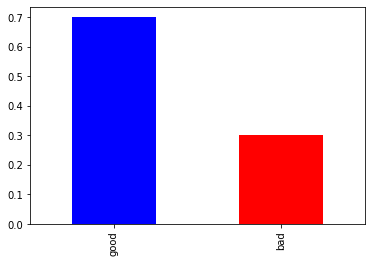

In [ ]:
df['Risk'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red']);

# Tipos de dados

In [ ]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

# Valores vazios

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# Train-test split

In [ ]:
X = df.drop(columns=['Risk'])
y = df['Risk'].map({'good': 0, 'bad': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Construção de pipeline de pré-processamento

In [ ]:
# Tratar categoricos -> OneHotEncoding
# Tratar númericos -> StandardScaling

preprocessing = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), selector(dtype_include='object')),
        ('std', StandardScaler(), selector(dtype_include='int64'))
    ]
)

# Modelagem

## Sem balanceamento

### Logistic Regression

In [ ]:
pipe_lr = Pipeline([
    ('pp', preprocessing),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_knn = Pipeline([
    ('pp', preprocessing),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_dt = Pipeline([
    ('pp', preprocessing),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## Random Oversampling

### Logistic Regression

In [ ]:
pipe_ros_lr = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_ros_knn = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_ros_dt = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## SMOTE

### Logistic Regression

In [ ]:
pipe_smt_lr = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_smt_knn = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_smt_dt = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## ADASYN

### Logistic Regression

In [ ]:
pipe_asy_lr = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_asy_knn = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_asy_dt = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## Random Undersampling

### Logistic Regression

In [ ]:
pipe_rus_lr = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_rus_knn = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_rus_dt = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## NearMiss

### NearMiss-1

#### Logistic Regression

In [ ]:
pipe_nmi_1_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('LR', LogisticRegression(random_state=42))
])

#### KNN

In [ ]:
pipe_nmi_1_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('KNN', KNeighborsClassifier())
])

#### Decision Tree

In [ ]:
pipe_nmi_1_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

### NearMiss-2

#### Logistic Regression

In [ ]:
pipe_nmi_2_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('LR', LogisticRegression(random_state=42))
])

#### KNN

In [ ]:
pipe_nmi_2_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('KNN', KNeighborsClassifier())
])

#### Decision Tree

In [ ]:
pipe_nmi_2_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

### NearMiss-3

#### Logistic Regression

In [ ]:
pipe_nmi_3_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('LR', LogisticRegression(random_state=42))
])

#### KNN

In [ ]:
pipe_nmi_3_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('KNN', KNeighborsClassifier())
])

#### Decision Tree

In [ ]:
pipe_nmi_3_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

## CNN

### Logistic Regression

In [ ]:
pipe_cnn_lr = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

### KNN

In [ ]:
pipe_cnn_knn = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

### Decision Tree

In [ ]:
pipe_cnn_dt = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

# Avaliação dos modelos

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Sem Balanceamento

### LR

In [ ]:
res = cross_validate(pipe_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4356


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.3641


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4786


## Random Oversampling

### LR

In [ ]:
res = cross_validate(pipe_ros_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5806


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_ros_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4783


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_ros_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.424


## SMOTE

### LR

In [ ]:
res = cross_validate(pipe_smt_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5773


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_smt_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4986


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_smt_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4456


## ADASYN

### LR

In [ ]:
res = cross_validate(pipe_asy_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5675


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_asy_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4903


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_asy_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4372


## Random Undersampling

### LR

In [ ]:
res = cross_validate(pipe_rus_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.565


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_rus_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4845


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_rus_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4856


## NearMiss

### NearMiss-1

#### LR

In [ ]:
res = cross_validate(pipe_nmi_1_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5215


#### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_nmi_1_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.459


#### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_nmi_1_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4917


### NearMiss-2

#### LR

In [ ]:
res = cross_validate(pipe_nmi_2_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5348


#### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_nmi_2_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4488


#### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_nmi_2_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4375


### NearMiss-3

#### LR

In [ ]:
res = cross_validate(pipe_nmi_3_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5644


#### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_nmi_3_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4515


#### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_nmi_3_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4275


## CNN

### LR

In [ ]:
res = cross_validate(pipe_cnn_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5769


### $k$-Nearest Neighbors

In [ ]:
res = cross_validate(pipe_cnn_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4822


### Decision Tree Classifier

In [ ]:
res = cross_validate(pipe_cnn_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4432
